In [42]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as SS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.model_selection import train_test_split

## Question 1

You create an OLS model using the price of a car to predict how many miles it will be driven before it is sold or traded in for the first time. For example, maybe a car costs $40,000 and 
it is driven 98012 miles before it is traded in to a dealership. The price is the only predictor. 
Your model has an R2 value of 0.92 for the testing data and 0.92 for the training data. What can we 
determine based on these values of R2? Select only one answer.

In [4]:
# True # If we consider just the training data, we would expect a scatterplot to show a line 
# (or something very close to it)

## this is because the R2 value here tells us that 92% of the variance in the target variable (miles driven), 
## can be explained by the predictors (just price) of the model. The model is well fit so some line-looking thing
## must be the model. Also there are only two dimensions so this is a line, not a plane.

## Question 2

When performing model validation according to what we discussed in class,
we build the model using all of the data we have available, and then separate out a subset 
of test data and score it

In [ ]:
# False

## This is false. We subset data to train and test, and use the training data to build the model. Then we test
## it against the training and testing data.

## Question 3

Suppose you have a data set with 2000 observations. You decide to perform k-fold validation 
with k = 20. Fill in the blanks below based on this. All of your answers should be integers.

In [ ]:
# Each fold will have # 100 # observations in it

# Each training set will have # 1900 # observations in it

# Each test set will have # 100 # observations in it

# Each observation in the data will be part of a test set # 1 # time(s)

## Question 4

We created a function in class called do_Kfold which is given below. What is the purpose of the lines shown in bold?

def do_Kfold(model,X,y,k,scaler = None, random_state = 146):

    from sklearn.model_selection import KFold
    
 __kf = KFold(n_splits=k, random_state = random_state, shuffle=True)__

 train_scores = []
 
 test_scores = []

 for idxTrain, idxTest in kf.split(X):
 
      Xtrain = X[idxTrain, :]
      
      Xtest = X[idxTest, :]
      
      ytrain = y[idxTrain]
      
      ytest = y[idxTest]

 if scaler != None:
 
     Xtrain = scaler.fit_transform(Xtrain)
     
     Xtest = scaler.transform(Xtest)

     model.fit(Xtrain,ytrain)

     train_scores.append(model.score(Xtrain,ytrain))
     
     test_scores.append(model.score(Xtest,ytest))
        
 return train_scores, test_scores

In [5]:
# To create an object which can determine how to divide the data into testing and training sets #

## Question 5

We've been using the term regularization a lot. Which of the following statements applies (is true) when we talk about regularization?

In [6]:
# The goal of regularization is to prevent models from being overfit #

## Question 6

You perform Ridge regression and the training score for your model is slightly lower than it was for 
the regular OLS model (e.g. it goes from 0.62 to 0.59). This means the regularization was not useful 
since the goal of regularization is to increase the training score.



In [9]:
# False

## Ridge regression is supposed to increase the score (the R2) the model has for the TESTING data, not the
## training score. Also the lower training score sometimes indicates a higher testing score, so this new model
## could very well be beneficial.

## Question 7

For both Lasso and Ridge regression we expect at least some of the coefficient values will be smaller (this means in theory based on how it works).

In [10]:
# True

## As you increase the alpha, then the coefficients fall

## Question 8

In [11]:
lung = pd.read_csv("./data-Copy1/lung.txt", sep="\t", on_bad_lines='warn')
lung

,PATIENT_ID,SEX,AGE_AT_SURGERY,SMOKING_HISTORY,SMOKING_PACK_YEARS,SUV,CT_SIZE,CN_STATUS,DLCO,FEV1,RFS_STATUS,RFS_MONTHS,OS_MONTHS,OS_STATUS
0,P-0000219,Female,52,Ever Smoker,5.00,10.3,3.4,Negative,88.0,108.0,1:Recurrence,24.566667,83.800000,0:LIVING
1,P-0000280,Female,62,Never Smoker,0.00,2.6,2.1,Negative,61.0,76.0,1:Recurrence,14.866667,77.433333,0:LIVING
2,P-0000627,Female,68,Ever Smoker,30.00,1.1,1.3,Negative,47.0,90.0,0:No recurrence,37.366667,37.366667,1:DECEASED
3,P-0000867,Male,64,Ever Smoker,10.00,10.2,3.6,Negative,85.0,89.0,1:Recurrence,11.433333,34.800000,1:DECEASED
4,P-0002534,Female,73,Never Smoker,0.00,10.5,3.4,Negative,96.0,102.0,1:Recurrence,10.166667,52.966667,0:LIVING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,P-0036744,Male,69,Ever Smoker,40.00,6.3,2.8,Negative,93.0,88.0,0:No recurrence,6.333333,6.333333,0:LIVING
514,P-0036810,Male,73,Ever Smoker,46.00,7.3,2.7,Negative,105.0,84.0,0:No recurrence,3.566667,3.566667,0:LIVING
515,P-0037833,Female,72,Ever Smoker,33.75,0.0,0.9,Negative,71.0,102.0,0:No recurrence,4.400000,4.400000,0:LIVING
516,P-0038206,Male,56,Never Smoker,0.00,1.6,1.5,Negative,108.0,122.0,0:No recurrence,0.533333,0.533333,0:LIVING


In [12]:
lung['RFS_MONTHS'].describe()

count    518.000000
mean      20.623938
std       12.387363
min        0.400000
25%       10.658333
50%       19.900000
75%       28.700000
max       89.366667
Name: RFS_MONTHS, dtype: float64

The questions that follow will make use of the lung adenocarcinoma data file. Be sure to read the information provided with the data file carefully.

We should always take a look at our data prior to creating models. We won't do that exhaustively since this is an assignment, but we can at least make sure we understand how. Take a look of at the distribution of RFS_MONTHS  - this should be by making a plot and/or calculating descriptive statistics. Which statement below accurately describes this variable?

In [13]:
# The IQR for the data set is approximately 27

# False #

## IQR for RFS_MONTHS is rather,
28.700000 - 10.658333
# 18.041666999999997

18.041666999999997

In [14]:
# A typical individual in this data set had about 12 months relapse free

# False #

print(lung['RFS_MONTHS'].median())
print(lung['RFS_MONTHS'].mean())

## Both the mean and the medians are far from 12

19.9
20.6239382238861


In [15]:
# The largest number of months relapse free in the data set is slightly less than 90

# True #

lung['RFS_MONTHS'].max()
## 89.36666667

89.36666667

(array([114., 121., 131.,  93.,  43.,  13.,   1.,   0.,   0.,   2.]),
 array([ 0.4       ,  9.29666667, 18.19333333, 27.09      , 35.98666667,
        44.88333333, 53.78      , 62.67666667, 71.57333334, 80.47      ,
        89.36666667]),
 <BarContainer object of 10 artists>)

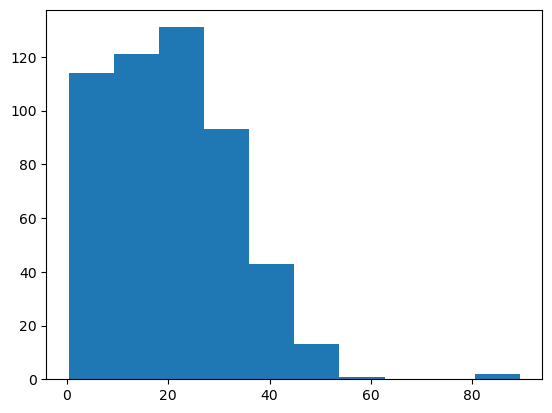

In [16]:
# The distribution is skewed left as most (>50%) individuals maintained relapse free status for
# more than 40 months

plt.hist(lung['RFS_MONTHS'])

# False #

## This is skewed right, rather. Also most individuals did infact not maintain that for more than 40 months

## Question 9

In [17]:
def do_Kfold(model,X,y,k,scaler = None, random_state = 146):
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=k, random_state = random_state, shuffle=True)

    train_scores = []
    test_scores = []

    for idxTrain, idxTest in kf.split(X): 
        Xtrain = X[idxTrain, :] 
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        model.fit(Xtrain,ytrain)

        train_scores.append(model.score(Xtrain,ytrain))
        test_scores.append(model.score(Xtest,ytest)) 
        
    return train_scores, test_scores

In [18]:
lung_cleaned = lung.drop(columns = ['PATIENT_ID', 'SEX', 'SMOKING_HISTORY', 'CN_STATUS', 'RFS_STATUS', 'OS_STATUS'])

In [19]:
lung_cleaned

,AGE_AT_SURGERY,SMOKING_PACK_YEARS,SUV,CT_SIZE,DLCO,FEV1,RFS_MONTHS,OS_MONTHS
0,52,5.00,10.3,3.4,88.0,108.0,24.566667,83.800000
1,62,0.00,2.6,2.1,61.0,76.0,14.866667,77.433333
2,68,30.00,1.1,1.3,47.0,90.0,37.366667,37.366667
3,64,10.00,10.2,3.6,85.0,89.0,11.433333,34.800000
4,73,0.00,10.5,3.4,96.0,102.0,10.166667,52.966667
...,...,...,...,...,...,...,...,...
513,69,40.00,6.3,2.8,93.0,88.0,6.333333,6.333333
514,73,46.00,7.3,2.7,105.0,84.0,3.566667,3.566667
515,72,33.75,0.0,0.9,71.0,102.0,4.400000,4.400000
516,56,0.00,1.6,1.5,108.0,122.0,0.533333,0.533333


In [20]:
lung_target = lung_cleaned.drop(columns = ['AGE_AT_SURGERY', 'SMOKING_PACK_YEARS', 'SUV', 'CT_SIZE', 'DLCO', 'FEV1', 'OS_MONTHS'])
lung_target

,RFS_MONTHS
0,24.566667
1,14.866667
2,37.366667
3,11.433333
4,10.166667
...,...
513,6.333333
514,3.566667
515,4.400000
516,0.533333


In [21]:
lung_predictors = lung_cleaned.drop(columns = ['RFS_MONTHS'])
lung_predictors

,AGE_AT_SURGERY,SMOKING_PACK_YEARS,SUV,CT_SIZE,DLCO,FEV1,OS_MONTHS
0,52,5.00,10.3,3.4,88.0,108.0,83.800000
1,62,0.00,2.6,2.1,61.0,76.0,77.433333
2,68,30.00,1.1,1.3,47.0,90.0,37.366667
3,64,10.00,10.2,3.6,85.0,89.0,34.800000
4,73,0.00,10.5,3.4,96.0,102.0,52.966667
...,...,...,...,...,...,...,...
513,69,40.00,6.3,2.8,93.0,88.0,6.333333
514,73,46.00,7.3,2.7,105.0,84.0,3.566667
515,72,33.75,0.0,0.9,71.0,102.0,4.400000
516,56,0.00,1.6,1.5,108.0,122.0,0.533333


In [22]:
lung_cleaned

,AGE_AT_SURGERY,SMOKING_PACK_YEARS,SUV,CT_SIZE,DLCO,FEV1,RFS_MONTHS,OS_MONTHS
0,52,5.00,10.3,3.4,88.0,108.0,24.566667,83.800000
1,62,0.00,2.6,2.1,61.0,76.0,14.866667,77.433333
2,68,30.00,1.1,1.3,47.0,90.0,37.366667,37.366667
3,64,10.00,10.2,3.6,85.0,89.0,11.433333,34.800000
4,73,0.00,10.5,3.4,96.0,102.0,10.166667,52.966667
...,...,...,...,...,...,...,...,...
513,69,40.00,6.3,2.8,93.0,88.0,6.333333,6.333333
514,73,46.00,7.3,2.7,105.0,84.0,3.566667,3.566667
515,72,33.75,0.0,0.9,71.0,102.0,4.400000,4.400000
516,56,0.00,1.6,1.5,108.0,122.0,0.533333,0.533333


In [23]:
lung_cleaned.isnull().sum()

AGE_AT_SURGERY        0
SMOKING_PACK_YEARS    0
SUV                   0
CT_SIZE               0
DLCO                  0
FEV1                  0
RFS_MONTHS            0
OS_MONTHS             0
dtype: int64

In [24]:
lung_cleaned.corr()

,AGE_AT_SURGERY,SMOKING_PACK_YEARS,SUV,CT_SIZE,DLCO,FEV1,RFS_MONTHS,OS_MONTHS
AGE_AT_SURGERY,1.000000,0.133641,0.013824,0.027379,-0.233823,0.000182,0.021811,-0.027324
SMOKING_PACK_YEARS,0.133641,1.000000,0.123455,-0.048775,-0.401903,-0.268955,0.008129,-0.045563
SUV,0.013824,0.123455,1.000000,0.380954,-0.156755,-0.109945,-0.118206,0.051605
CT_SIZE,0.027379,-0.048775,0.380954,1.000000,-0.080127,-0.017821,-0.039798,0.046051
DLCO,-0.233823,-0.401903,-0.156755,-0.080127,1.000000,0.463421,0.028139,0.003068
FEV1,0.000182,-0.268955,-0.109945,-0.017821,0.463421,1.000000,0.005408,0.027380
RFS_MONTHS,0.021811,0.008129,-0.118206,-0.039798,0.028139,0.005408,1.000000,0.774794
OS_MONTHS,-0.027324,-0.045563,0.051605,0.046051,0.003068,0.027380,0.774794,1.000000


In [25]:
# matrix = np.corrcoef(lung_cleaned['SUV'], lung_target)
# print(matrix)

Continuing with our data exploration: feature variables that are highly correlated with the target may be good predictors in terms of regression. We also often want to know about relationships between features as well. Calculate correlation coefficients between all of the features (the 7 numeric variables indicated in the Data description) and the target (RFS_MONTHS), i.e. all of the features versus each other and versus the target, all 8 variables versus each other. You can just calculate the whole matrix from the original data frame to do this. Remember, do NOT use a heatmap to answer homework questions.

Based on the correlation coefficients, which statements below apply to bivariate relationships between the variables in the data set?




In [26]:
# We would expect that as FEV1 decreases, DLCO also decreases #

# The strongest negative correlation (just based on the coefficients) in the data set is #
# between DLCO and SMOKING_PACK_YEARS #

# More of the features appear to have weak positive linear correlations with the target #
# (based on just the correlation coefficients) than other types of linear correlations #

# OS_MONTHS is the most strongly correlated value with the target #

# Question 10

Perform k-fold validation of OLS on the lung adenocarcinoma data. Remember that the target is RFS_MONTHS. 
Use the following parameters:

-Regular OLS (not Ridge or Lasso)

-No scaling

-15 folds

-random state 96

-shuffle = True



In [27]:
lung_predictors.columns

Index(['AGE_AT_SURGERY', 'SMOKING_PACK_YEARS', 'SUV', 'CT_SIZE', 'DLCO',
       'FEV1', 'OS_MONTHS'],
      dtype='object')

In [28]:
X = np.array(lung_predictors)

In [29]:
y = np.array(lung_target)

In [44]:
lin_reg = LR()

In [45]:
lung_results = do_Kfold(model = lin_reg, X = X, y = y, k = 15, scaler = None, random_state = 96)
lung_results

([0.6436431111981468,
  0.6318780431873561,
  0.6478026057920366,
  0.6189513869758378,
  0.6400761632003255,
  0.6443664495177475,
  0.6227146932115002,
  0.6275282593092161,
  0.6282146522532654,
  0.6276934826201228,
  0.6411810822928681,
  0.6665803790002025,
  0.6111102682004759,
  0.6291875725172636,
  0.6314548583607382],
 [0.4238485605118232,
  0.6276388872439458,
  0.4921906144991548,
  0.7983871820097428,
  0.5001918456854675,
  0.41053516711333116,
  0.7636241400450386,
  0.700940367827481,
  0.7366900039301074,
  0.7475630987971951,
  0.42462962458437525,
  0.1560031917064627,
  0.8034505938504979,
  0.6943096483526803,
  0.6544395070613784])

In [46]:
lung_train_scores = lung_results[0]
lung_test_scores = lung_results[1]

In [47]:
np.var(lung_train_scores)

0.0001711719653149822

In [48]:
np.var(lung_test_scores)

0.032460302452812326

Based on your results, which statement applies?

In [49]:
# The scores for the test data varied more than the scores for the training data #

In [50]:
## The variance value for the training scores seems to be less than for the test scores.
## This tells us that the testing data varies more than the training data

In [51]:
np.mean(lung_train_scores)

0.6341588671758068

In [52]:
np.mean(lung_test_scores)

0.5956294955479121

In [59]:
ss = SS()

In [60]:
train_resu_ss, test_resu_ss = do_Kfold(model = lin_reg, X = X, y = y, k = 15, scaler = ss, random_state = 96)
train_resu_ss = np.round(train_resu_ss, 2)
print(train_resu_ss, test_resu_ss)

[0.64 0.63 0.65 0.62 0.64 0.64 0.62 0.63 0.63 0.63 0.64 0.67 0.61 0.63
 0.63] [0.4238485605118225, 0.6276388872439458, 0.49219061449915424, 0.7983871820097426, 0.5001918456854674, 0.4105351671133315, 0.7636241400450384, 0.7009403678274808, 0.7366900039301073, 0.7475630987971955, 0.42462962458437603, 0.15600319170646126, 0.8034505938504982, 0.6943096483526809, 0.6544395070613787]


# Question 11

In [70]:
lin_reg = LR()

Using the lung adenocarcinoma data, split the data into a testing and training set according to the following:

-Use random state 165

-Use shuffle = True

-Use a test size of 0.25 and a training size of 0.75

-Scale the training and testing data as we did in class (you should refer back to your class notes and notebooks)

-Remember the target is RFS_MONTHS, and the other numeric variables are the predictors

Fit the model to the training data, score it, and then score the test data. Based on your results, you can determine that:

(You may need to do additional work, i.e. write more code, to answer some of the questions below)

Select ALL answers that apply - there may be more than 1.

In [72]:
def do_Q11_Kfold(model,X,y,k,scaler = None, random_state = 146):
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=k, random_state = random_state, shuffle=True) 

    
    
    train_scores = [] 
    test_scores = []

    for idxTrain, idxTest in kf.split(X): 
        Xtrain = X[idxTrain, :] 
        Xtest = X[idxTest, :] 
        ytrain = y[idxTrain] 
        ytest = y[idxTest] 
        if scaler != None: 
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest) 

        model.fit(Xtrain,ytrain) 

        train_scores.append(model.score(Xtrain,ytrain)) 
        test_scores.append(model.score(Xtest,ytest))
        
    return train_scores, test_scores, model.coef_

In [73]:
print(lung_predictors.columns)
do_Q11_Kfold(model = lin_reg, X = X, y = y, k = 4, scaler = ss, random_state = 165) 

Index(['AGE_AT_SURGERY', 'SMOKING_PACK_YEARS', 'SUV', 'CT_SIZE', 'DLCO',
       'FEV1', 'OS_MONTHS'],
      dtype='object')


([0.6236764799744057,
  0.6589824383337073,
  0.6550700337181049,
  0.6054127838341331],
 [0.6586341159544495,
  0.5491200992172436,
  0.5479854403035024,
  0.697644104862787],
 array([[ 0.32054734,  0.93272521, -2.05221738,  0.06035959,  0.5707709 ,
         -0.38363899,  9.47263359]]))

In [76]:
ss = SS()

In [77]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75, random_state = 165) 
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [78]:
X_train

array([[ 68.        ,  25.        ,   4.7       , ...,  93.        ,
        120.        ,   6.66666667],
       [ 57.        ,   6.        ,   2.3       , ...,  80.        ,
         81.        ,   9.7       ],
       [ 82.        ,  60.        ,   2.1       , ...,  74.        ,
        103.        ,  14.43333333],
       ...,
       [ 56.        ,  32.        ,   1.9       , ...,  98.        ,
         98.        ,  49.26666667],
       [ 68.        ,  40.        ,   5.1       , ...,  66.        ,
         98.        ,   4.73333333],
       [ 77.        ,   0.        ,  12.79      , ...,  83.        ,
        136.        ,  31.76666667]])

In [79]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [80]:
lin_reg.score(X_test_scaled, y_test)

0.6586341159544493

In [81]:
print(lung_predictors.columns)

Index(['AGE_AT_SURGERY', 'SMOKING_PACK_YEARS', 'SUV', 'CT_SIZE', 'DLCO',
       'FEV1', 'OS_MONTHS'],
      dtype='object')


In [82]:
columns_array = np.array(lung_predictors.columns)
columns_array = list(columns_array)
columns_array

['AGE_AT_SURGERY',
 'SMOKING_PACK_YEARS',
 'SUV',
 'CT_SIZE',
 'DLCO',
 'FEV1',
 'OS_MONTHS']

In [83]:
lin_reg.coef_[0]

array([ 0.90390402,  1.10309276, -1.91798656, -0.22067559,  0.99220282,
       -0.69781347,  9.78688045])

In [84]:
q11_coefficients = lin_reg.coef_[0]
q11_new_coefficients = []
for i in q11_coefficients:
    q11_new_coefficients.append(i)
q11_coefficients = list(q11_coefficients)
q11_new_coefficients

[0.9039040215943144,
 1.1030927596973026,
 -1.9179865586756257,
 -0.22067558771016804,
 0.9922028236343583,
 -0.6978134688530696,
 9.786880450251681]

In [85]:
dictionary = dict(zip(q11_new_coefficients, columns_array))
dictionary

{0.9039040215943144: 'AGE_AT_SURGERY',
 1.1030927596973026: 'SMOKING_PACK_YEARS',
 -1.9179865586756257: 'SUV',
 -0.22067558771016804: 'CT_SIZE',
 0.9922028236343583: 'DLCO',
 -0.6978134688530696: 'FEV1',
 9.786880450251681: 'OS_MONTHS'}

In [89]:
np.abs(q11_new_coefficients).argmin()

3

In [91]:
dictionary[q11_coefficients[np.abs(q11_new_coefficients).argmin()]]

'CT_SIZE'

In [92]:
# The coefficient for SUV is has the smallest magnitude (i.e. the absolute value)

# FALSE #

## CT_SIZE has the smallest absolute value

In [196]:
lin_reg.fit(X_train, y_train) 

LinearRegression()

In [197]:
lin_reg.score(X_test, y_test)


0.6586341159544494

In [198]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [199]:
lin_reg.score(X_test_scaled, y_test)

0.6586341159544493

In [200]:
## The score for the testing data is 0.67 if we round to two decimal places

# FALSE #

In [93]:
dictionary_reversed = dict(zip(columns_array, q11_new_coefficients))
dictionary_reversed

{'AGE_AT_SURGERY': 0.9039040215943144,
 'SMOKING_PACK_YEARS': 1.1030927596973026,
 'SUV': -1.9179865586756257,
 'CT_SIZE': -0.22067558771016804,
 'DLCO': 0.9922028236343583,
 'FEV1': -0.6978134688530696,
 'OS_MONTHS': 9.786880450251681}

In [94]:
dictionary_reversed['FEV1']

-0.6978134688530696

In [95]:
# The coefficient for FEV1 is approximately -0.698 (rounded)

# TRUE #

In [96]:
X_train

array([[ 68.        ,  25.        ,   4.7       , ...,  93.        ,
        120.        ,   6.66666667],
       [ 57.        ,   6.        ,   2.3       , ...,  80.        ,
         81.        ,   9.7       ],
       [ 82.        ,  60.        ,   2.1       , ...,  74.        ,
        103.        ,  14.43333333],
       ...,
       [ 56.        ,  32.        ,   1.9       , ...,  98.        ,
         98.        ,  49.26666667],
       [ 68.        ,  40.        ,   5.1       , ...,  66.        ,
         98.        ,   4.73333333],
       [ 77.        ,   0.        ,  12.79      , ...,  83.        ,
        136.        ,  31.76666667]])

In [97]:
len(X_train)

388

In [98]:
X_train.shape[0]

388

In [99]:
np.size(X_train)

2716

In [100]:
X.shape[0] * 0.75

388.5

In [101]:
y.shape[0]

518

In [102]:
# There are 414 observations in the training data

# FALSE #

In [211]:
print(lin_reg.score(X_train_scaled, y_train))
print(lin_reg.score(X_test_scaled, y_test))

0.6236764799744058
0.6586341159544493


In [212]:
## The model performs better on the testing data than the training data

# TRUE #

In [213]:
# The model is overfit

# FALSE #

# Question 12

Find the optimal alpha value for Lasso regression on the lung adenocarcinoma data. Use the same set of features and the same target (RFS_MONTHS) that you have been using.

Be sure to:


-Use 10-fold validation
-Use random_state 100
-Scale the data with a StandardScaler
-Test 100 values between 0.01 and 0.5 (these 3 numbers should appear in your code)


Report the optimal alpha value to four decimal places 

In [104]:
a_range = np.linspace(0.01,0.5, 100) 
k = 10
ss = SS()

avg_tr_score=[]
avg_te_score=[]

for a in a_range:
    las_reg = Lasso(alpha=a)
    train_scores, test_scores = do_Kfold(las_reg, X, y, k, ss, random_state = 100)
    
    avg_tr_score.append(np.mean(train_scores))
    avg_te_score.append(np.mean(test_scores))


In [105]:
print(avg_te_score)

[0.5729267525934387, 0.5730025297718461, 0.5730750562914719, 0.5731437112493266, 0.5732084946196734, 0.573269397102135, 0.5733125947335731, 0.5733419595403044, 0.5733679062030107, 0.5733841467820922, 0.5733774062922439, 0.5733670289148443, 0.573353015392325, 0.5733353561450847, 0.5733140549152872, 0.5732896592259437, 0.5732610976757379, 0.573228903457187, 0.5731938361276305, 0.5731566872502059, 0.5731171880782184, 0.5730740438895606, 0.5730272320346419, 0.572976754838512, 0.5729226152826759, 0.572865148577861, 0.5728036322781328, 0.5727384499404948, 0.5726696019747588, 0.5725983004432351, 0.5725238647358664, 0.5724456768650101, 0.5723638616176872, 0.5722784169012295, 0.5721886150759687, 0.5720959110675367, 0.5720050402781515, 0.5719346096412965, 0.5718820338263466, 0.5718262564797649, 0.571783390476002, 0.5717392766768977, 0.5716903807865958, 0.5716397765391302, 0.5715858822973978, 0.571544056127671, 0.5715180189467498, 0.571506728539101, 0.5714982761143003, 0.5714913130348125, 0.57148

In [106]:
len(avg_te_score)

100

In [107]:
dictionary2 = dict(zip(avg_te_score, a_range))
dictionary2

{0.5729267525934387: 0.01,
 0.5730025297718461: 0.014949494949494949,
 0.5730750562914719: 0.0198989898989899,
 0.5731437112493266: 0.02484848484848485,
 0.5732084946196734: 0.029797979797979796,
 0.573269397102135: 0.03474747474747475,
 0.5733125947335731: 0.039696969696969696,
 0.5733419595403044: 0.04464646464646465,
 0.5733679062030107: 0.049595959595959596,
 0.5733841467820922: 0.05454545454545454,
 0.5733774062922439: 0.059494949494949496,
 0.5733670289148443: 0.06444444444444444,
 0.573353015392325: 0.06939393939393938,
 0.5733353561450847: 0.07434343434343434,
 0.5733140549152872: 0.07929292929292929,
 0.5732896592259437: 0.08424242424242423,
 0.5732610976757379: 0.08919191919191918,
 0.573228903457187: 0.09414141414141414,
 0.5731938361276305: 0.09909090909090908,
 0.5731566872502059: 0.10404040404040403,
 0.5731171880782184: 0.10898989898989898,
 0.5730740438895606: 0.11393939393939392,
 0.5730272320346419: 0.11888888888888888,
 0.572976754838512: 0.12383838383838383,
 0.5729

In [108]:
key = np.max(avg_te_score)
key

0.5733841467820922

In [109]:
dictionary2[key] 

0.05454545454545454

In [ ]:
# The optimal alpha value is 0.0545 #

# Question 13

Based on the k fold validation you did to find the optimal value of alpha in the previous question, what was the mean test score at the optimal value of alpha? Round your answer to 2 decimal places.

In [112]:
key = np.max(avg_te_score)
key

0.5733841467820922

# Question 14

The optimal value of alpha for Ridge regression for the lung adenocarcinoma data is 26.36 (just use this value, we are giving it to you). Use a single train-test split to perform Ridge regression as well as OLS - this means you are building two models, one using Ridge regression and one using OLS:

-Use random state 196

-Use shuffle = True

-Use a test size of 0.2 and a training size of 0.8

-Scale the training and testing data as we did in class (you should refer back to your class notes and notebooks) - use the scaled data for both Ridge and OLS

Based on your results, what do you conclude?

In [114]:
train_datax, test_datax, train_datay, test_datay = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 196, shuffle = True)

In [115]:
train_datax_scaled = ss.fit_transform(train_datax)
test_datax_scaled = ss.transform(test_datax)


In [116]:
lin_reg.fit(train_datax_scaled, train_datay)

LinearRegression()

In [117]:
OLS_train_scores = lin_reg.score(train_datax_scaled, train_datay)
OLS_test_scores = lin_reg.score(test_datax_scaled, test_datay)

In [118]:
OLS_train_scores

0.6362384618259316

In [119]:
OLS_test_scores

0.6058259695629911

In [120]:
from sklearn.linear_model import Ridge
rid_reg = Ridge(alpha = 26.36)

In [121]:
rid_reg.fit(train_datax_scaled, train_datay)

Ridge(alpha=26.36)

In [122]:
Ridge_train_scores = rid_reg.score(train_datax_scaled, train_datay)
Ridge_test_scores = rid_reg.score(test_datax_scaled, test_datay)

In [123]:
Ridge_train_scores

0.6338070427929802

In [124]:
Ridge_test_scores

0.6006464150806479

In [125]:
lung_predictors.columns

Index(['AGE_AT_SURGERY', 'SMOKING_PACK_YEARS', 'SUV', 'CT_SIZE', 'DLCO',
       'FEV1', 'OS_MONTHS'],
      dtype='object')

In [126]:
lin_reg.coef_

array([[ 0.35332802,  0.76878895, -1.71684684, -0.5093977 ,  0.6066932 ,
        -0.66054757,  9.8516851 ]])

In [127]:
rid_reg.coef_

array([[ 0.32983307,  0.66106823, -1.57832109, -0.52121956,  0.51125327,
        -0.59084936,  9.25026931]])

In [128]:
# For Ridge regression, both the testing and training scores are less than the respective scores (train vs 
# train, test vs test) for OLS

# TRUE #

# Question 15

The next two questions will make use of the work_retention data. Use commute as the target, and the other 4 numeric predictors: age, children, years worked, and salary as the features.

The optimal alpha value for Lasso regression is 0.02129 (I'm telling you this, it is correct). You obtain an average testing score of 0.5523 and an average training score of 0.6046 for the 10 fold cross-validation with this alpha value. What does all of this mean (based on the way we have done this in class)?Select ALL answers below that apply.

You will need to create some additional models and do further analysis to answer this question. Be sure to scale the data if you are doing Lasso regression - it is also fine to scale the data for OLS. You do NOT need to re-run k-fold validation for Lasso regression (if you do, you might get slightly different numbers depending on the random state).

In [134]:
work = pd.read_csv("./data-Copy1/work_retention.csv")

In [135]:
work.head()

,age,children,commute,salary,years worked,retain
0,63,0,0.095167,54233,2.18,1
1,64,0,0.044500,64739,4.53,1
2,40,1,0.159167,95953,4.57,1
3,58,5,0.091167,59038,2.99,1
4,63,0,0.016000,7958,4.36,1


In [136]:
metadata = work[['commute','retain']]
X2_df = work.drop(columns = list(metadata.columns))
X2 = np.array(X2_df)
# X

In [137]:
y2 = work['commute'].values
# y

In [138]:
ss = SS()
X2_scaled = ss.fit_transform(X2)
# X2_scaled

In [139]:
# TRUE # If we made a plot of the average testing scores for Lasso regression using a range of alpha 
# values, based on the information given, would we expect to see the peak would be at 0.02129

## this is true because the optimal alpha value is at 0.02129, so that means that the alpha value with the 
## highest average testing score is 0.02129. The average testing score at 0.02129 is the peak of the graph

In [140]:
# FALSE # We can also infer, without any need to test it, that 0.02129 is the optimal alpha value for 
# Ridge regression

## False because the lasso and ridge optimal alpha values often differ. We cannot infer that this is true.

In [141]:
lin_reg = LR()

In [142]:
results = do_Kfold(model = lin_reg, X = X2_scaled, y = y2, k = 10,random_state = 201)
results

([0.6105474768984067,
  0.6122949462080931,
  0.6157474164753077,
  0.626703056152337,
  0.5847072319582912,
  0.6028449964755502,
  0.6146873507262262,
  0.6083404511987016,
  0.6239172717928834,
  0.6219609144411438],
 [0.5902042700060559,
  0.5945828499787905,
  0.5326689589107849,
  0.417907225277943,
  0.7984557745023815,
  0.6719010439226457,
  0.5733446004706597,
  0.6415912201928211,
  0.4081622452665864,
  0.4757698532479948])

In [143]:
np.mean(results[1])

0.5704588041776664

In [144]:
np.max(results[1])

0.7984557745023815

In [145]:
# If we perform 10-fold cross validation on an OLS model (random_state = 201), the average testing score 
# is greater than the corresponding average testing score given for Lasso in the question

# TRUE #

## 0.5704588041776664 (of OLS)
## is greater than the previous average testing score (of lasso) of 0.5523

In [146]:
# In general, when we choose a value of alpha for Lasso regression the way we have done in class, we want 
# the value that maximizes the average training score

# FALSE #

## We are looking for the alpha value that maximizes the value of the testing score, not the trainig score.

In [147]:
# When we fit an OLS model to ALL of the data (no k fold validation), the score is greater than the score 
# for a Lasso model fit to ALL of the data using alpha = 0.02129

# [If greater than is stressing you out, let's say we will consider out to 6 decimal places. 
# If you are nervous about using a random state for Lasso, use 201 - it doesn't actually matter.]

# TRUE #

In [148]:
lin_reg.fit(X2_scaled, y2)
lin_reg.score(X2_scaled, y2)

0.6111278434979339

In [149]:
las_reg = Lasso(alpha = 0.02129)
las_reg.fit(X2_scaled, y2)
las_reg.score(X2_scaled, y2)

0.604776793961493

# Question 16

Using the work_retention data with commute as the target and the predictors described previously, compare the coefficients for OLS using the entire data set scaled (this means ALL of the data) and Lasso regression (using alpha = 0.02129) using the entire data set scaled (this means ALL of the data, no k-fold validation). You should have already done both of these things in the previous question, so just look at your output. Which variables did Lasso regression drop from the model? (Select ALL that were dropped.)

In [150]:
X2_df.columns

Index(['age', 'children', 'salary', 'years worked'], dtype='object')

In [151]:
lin_reg.coef_

array([-0.00946763,  0.00683362, -0.01540272, -0.27777825])

In [152]:
# X2

In [153]:
las_reg.coef_

array([-0.        ,  0.        , -0.        , -0.25654165])

In [154]:
# age, children, and salary were dropped #